In [1]:

# Task 1: Preprocessing & Tokenization


import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK tokenizer if not already installed
nltk.download('punkt')



df = pd.read_csv("dataset.csv")

print("Dataset shape:", df.shape)
df.head(100)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Dataset shape: (50000, 20)


,id,url,domain,top_level_domain,crawl_date,http_status,mime_type,charset,language,is_https,has_js,num_images,outlinks_count,inlinks_count,anchors_count,content_length,page_rank,title,meta_description,content
0,1,https://www.blogsite2671.gov/footer/header/vec...,blogsite2671,gov,2025-02-02T09:58:57Z,301,application/xhtml+xml,utf-8,en,True,True,9,7,5,2,574,0.0000,Page Description User Footer Cloud,Stem model date tfidf anchor xml script search...,Keyword article mapreduce cloud mapreduce sear...
1,2,https://www.newsportal736.info/lemma,newsportal736,info,2024-05-22T04:44:41Z,200,text/html,utf-8,en,True,True,8,5,0,0,719,2.9497,Mapreduce Javascript View Mapreduce,Description model embed python click endpoint ...,Navigation crawl learning cloud endpoint click...
2,3,https://www.demo1072.com/hadoop/footer,demo1072,com,2024-08-16T00:52:22Z,200,text/html,iso-8859-1,en,True,True,6,11,0,2,1008,5.5591,Model Analysis Sidebar Content Json Script Date,Ugc learning mapreduce stem mapreduce video co...,Extract analysis download search analysis tfid...
3,4,https://www.example145.com/json,example145,com,2024-07-05T20:34:44Z,200,application/pdf,windows-1252,en,True,True,3,7,0,1,518,0.4695,Data Ugc View Content,Error lemma title stem api snippet comment vid...,Header request vector download nofollow anchor...
4,5,https://www.newsportal1665.gov/link/tokenize/l...,newsportal1665,gov,2025-01-23T21:06:10Z,200,application/pdf,iso-8859-1,de,True,True,5,1,0,1,1071,0.5288,Clean Header User Tokenize Dataset,Image embed extract mapreduce spark view heade...,Service endpoint download date request login s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,https://www.demo218.org/comment,demo218,org,2025-10-21T10:37:00Z,200,text/html,iso-8859-1,en,True,True,10,5,4,1,731,0.2590,Footer Page Title Dataset Download Image,User api user scala network time java stem vie...,Navigation dataset css learning bow author cra...
96,97,https://www.datasource415.com/index/dataset,datasource415,com,2024-01-12T03:47:25Z,200,text/html,windows-1252,en,True,False,8,1,0,2,880,1.4974,Vector Footer Anchor Nofollow Nofollow Subscri...,Click content login css token view image time ...,Header python anchor dataset token ugc bow des...
97,98,http://www.archive1457.net/download/api,archive1457,net,2024-02-11T09:49:36Z,200,text/html,utf-8,en,False,True,6,10,0,2,647,3.4522,View Search Comment Content,Search learning view summary model snippet dow...,Scala nofollow scala index nofollow tfidf down...
98,99,https://www.demo1121.de/date,demo1121,de,2025-08-14T12:59:14Z,200,text/html,windows-1252,en,True,True,4,6,2,2,798,3.9033,Python Nofollow Learning Mapreduce,Navigation stem blog image tfidf footer spark ...,Nofollow ugc embed news tokenize json date cli...


In [11]:

# Load provided stopwords.txt
stopwords = set()

with open("stopwords.txt", "r", encoding="utf-8") as f:
    for line in f:
        stopwords.add(line.strip().lower())

# Add dataset-specific stopwords 
additional_tokens = [
    "http", "https", "www", "com", org", "net",
    "nbsp", "amp", "lt", "gt", "br", "div", "span"
]

# Add them to stopword set
for token in additional_tokens:
    stopwords.add(token)

print("Total stopwords:", len(stopwords))


Total stopwords: 152


In [12]:
import nltk
import ssl

# Fix SSL certificate errors (sometimes needed on Windows/Anaconda)
try:
    _create_default_https_context = ssl._create_default_https_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = ssl._create_unverified_context

# Download correct NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:

# Task 2: Stemming and Lemmatization


# Import required libraries
import pandas as pd
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer

# Initialize tokenizer, stemmers, and lemmatizer
tokenizer = TreebankWordTokenizer()
porter = PorterStemmer()
snowball = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()



# Preprocessing function: tokenize, stem, lemmatize
def preprocess_tokens(text):
    if not isinstance(text, str):
        text = ""
    
    # Tokenize and remove stopwords / non-alphabetic tokens
    tokens = [t.lower() for t in tokenizer.tokenize(text) 
              if t.isalpha() and t.lower() not in stopwords]
    
    # Apply stemming
    porter_stemmed = [porter.stem(t) for t in tokens]
    snowball_stemmed = [snowball.stem(t) for t in tokens]
    
    # Apply lemmatization
    lemmatized = [lemmatizer.lemmatize(t) for t in tokens]
    
    return pd.Series({
        'tokens': tokens,
        'porter_stemmed': porter_stemmed,
        'snowball_stemmed': snowball_stemmed,
        'lemmatized': lemmatized
    })

# Apply preprocessing to all documents in 'content' column
df_processed = df['content'].apply(preprocess_tokens)

# Display first 10 rows for comparison
pd.set_option('display.max_colwidth', None)
df_processed.head(10)


,tokens,porter_stemmed,snowball_stemmed,lemmatized
0,"[keyword, mapreduce, cloud, mapreduce, search, view, snippet, analysis, endpoint, service, anchor, anchor, json, keyword, network, spark, blog, crawl, error, vector, extract, service, analysis, css, image, blog, author, news, data, search, service, html, meta, spark, learning, extract, extract, video, summary, header, search, header, data, author, content, data, meta, search, json, python, extract, response, service, snippet, bow, blog, news, bow, comment, response, scala, css, download, page, lemma, comment, cloud, anchor, token, bow]","[keyword, mapreduc, cloud, mapreduc, search, view, snippet, analysi, endpoint, servic, anchor, anchor, json, keyword, network, spark, blog, crawl, error, vector, extract, servic, analysi, css, imag, blog, author, news, data, search, servic, html, meta, spark, learn, extract, extract, video, summari, header, search, header, data, author, content, data, meta, search, json, python, extract, respons, servic, snippet, bow, blog, news, bow, comment, respons, scala, css, download, page, lemma, comment, cloud, anchor, token, bow]","[keyword, mapreduc, cloud, mapreduc, search, view, snippet, analysi, endpoint, servic, anchor, anchor, json, keyword, network, spark, blog, crawl, error, vector, extract, servic, analysi, css, imag, blog, author, news, data, search, servic, html, meta, spark, learn, extract, extract, video, summari, header, search, header, data, author, content, data, meta, search, json, python, extract, respons, servic, snippet, bow, blog, news, bow, comment, respons, scala, css, download, page, lemma, comment, cloud, anchor, token, bow]","[keyword, mapreduce, cloud, mapreduce, search, view, snippet, analysis, endpoint, service, anchor, anchor, json, keyword, network, spark, blog, crawl, error, vector, extract, service, analysis, cs, image, blog, author, news, data, search, service, html, meta, spark, learning, extract, extract, video, summary, header, search, header, data, author, content, data, meta, search, json, python, extract, response, service, snippet, bow, blog, news, bow, comment, response, scala, cs, download, page, lemma, comment, cloud, anchor, token, bow]"
1,"[navigation, crawl, learning, cloud, endpoint, dataset, user, stem, link, date, spark, vector, embed, title, css, page, content, service, tokenize, error, crawl, description, bow, scala, anchor, dataset, tfidf, search, css, image, search, index, token, json, spark, navigation, post, data, date, vector, title, tokenize, login, tfidf, tfidf, javascript, learning, author, response, error, anchor, xml, html, meta, script, embed, comment, error, learning, javascript, keyword, comment, crawl, neural, mapreduce, video, snippet, java, title, java, view, comment, tokenize, tfidf, summary, data, response, tfidf, image, dataset, python, service, spark, javascript, tfidf, vector, keyword, video]","[navig, crawl, learn, cloud, endpoint, dataset, user, stem, link, date, spark, vector, emb, titl, css, page, content, servic, token, error, crawl, descript, bow, scala, anchor, dataset, tfidf, search, css, imag, search, index, token, json, spark, navig, post, data, date, vector, titl, token, login, tfidf, tfidf, javascript, learn, author, respons, error, anchor, xml, html, meta, script, emb, comment, error, learn, javascript, keyword, comment, crawl, neural, mapreduc, video, snippet, java, titl, java, view, comment, token, tfidf, summari, data, respons, tfidf, imag, dataset, python, servic, spark, javascript, tfidf, vector, keyword, video]","[navig, crawl, learn, cloud, endpoint, dataset, user, stem, link, date, spark, vector, emb, titl, css, page, content, servic, token, error, crawl, descript, bow, scala, anchor, dataset, tfidf, search, css, imag, search, index, token, json, spark, navig, post, data, date, vector, titl, token, login, tfidf, tfidf, javascript, learn, author, respons, error, anchor, xml, html, meta, script, emb, comment, error, learn, javascript, keyword, comment, crawl

In [14]:
print(df_processed.columns)

Index(['tokens', 'porter_stemmed', 'snowball_stemmed', 'lemmatized'], dtype='object')


In [16]:

# Task 3: Build Document-Term Matrix (Bag-of-Words)


import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Combine lemmatized tokens back into strings per document
df['lemmatized_text'] = df_processed['lemmatized'].apply(lambda x: ' '.join(x))

# Initialize CountVectorizer with vocabulary pruning
vectorizer = CountVectorizer(min_df=5, max_df=0.85)

# Fit and transform the lemmatized text to create DTM
dtm = vectorizer.fit_transform(df['lemmatized_text'])  # this is a sparse matrix

# Convert sparse matrix to DataFrame for easier inspection
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

# Check DTM shape
print("DTM shape (documents x terms):", dtm_df.shape)


# Report top 50 terms by document frequency


# Document frequency: number of documents containing each term
doc_freq = (dtm_df > 0).sum(axis=0)

# Sort by document frequency descending
top50_terms = doc_freq.sort_values(ascending=False).head(50)

# Create table
top50_df = pd.DataFrame({
    'term': top50_terms.index,
    'document_frequency': top50_terms.values
})

# Display top 50 terms
pd.set_option('display.max_rows', 50)
print(top50_df)



DTM shape (documents x terms): (50000, 65)
           term  document_frequency
0        vector               37458
1          link               37427
2       service               37408
3         spark               37368
4       content               37368
5       network               37364
6         clean               37359
7       extract               37331
8           bow               37331
9         video               37331
10     analysis               37321
11      comment               37311
12        login               37310
13        scala               37307
14       header               37306
15       author               37301
16         time               37296
17        model               37291
18       script               37287
19      keyword               37285
20         view               37279
21        tfidf               37264
22     learning               37264
23   javascript               37257
24         post               37257
25         meta      

In [17]:

# Task 4: Compute TF-IDF and select Top K words


import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine lemmatized tokens back into strings per document (if not done already)
df['lemmatized_text'] = df_processed['lemmatized'].apply(lambda x: ' '.join(x))

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_text'])

# Convert to DataFrame for easier handling
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


# Aggregate TF-IDF scores across all documents

tfidf_sum = tfidf_df.sum(axis=0)  # sum of TF-IDF per word across documents

# Function to get top K words by aggregate TF-IDF
def get_top_k_tfidf(tfidf_sum, K=50):
    top_k = tfidf_sum.sort_values(ascending=False).head(K)
    top_k_df = pd.DataFrame({
        'term': top_k.index,
        'aggregate_tfidf': top_k.values
    })
    return top_k_df

# Example: Top 50 words
top50_tfidf = get_top_k_tfidf(tfidf_sum, K=50)
print("Top 50 words by TF-IDF:")
print(top50_tfidf)

# Example: Top 100 words
top100_tfidf = get_top_k_tfidf(tfidf_sum, K=100)

# Example: Top 200 words
top200_tfidf = get_top_k_tfidf(tfidf_sum, K=200)


# Save TF-IDF vectors for top K words as CSV

# Select columns corresponding to top K words
def save_top_k_vectors(tfidf_df, top_k_df, filename='tfidf_top50.csv'):
    selected_columns = top_k_df['term'].tolist()
    tfidf_top_k = tfidf_df[selected_columns]
    tfidf_top_k.to_csv(filename, index=False)
    print(f"Saved TF-IDF vectors for top {len(selected_columns)} words to {filename}")

# Save top 50 TF-IDF vectors
save_top_k_vectors(tfidf_df, top50_tfidf, filename='tfidf_top50.csv')

# Save top 100 TF-IDF vectors
save_top_k_vectors(tfidf_df, top100_tfidf, filename='tfidf_top100.csv')

# Save top 200 TF-IDF vectors
save_top_k_vectors(tfidf_df, top200_tfidf, filename='tfidf_top200.csv')




Top 50 words by TF-IDF:
           term  aggregate_tfidf
0        anchor      6009.656371
1          link      4717.459325
2       service      4715.672980
3         scala      4708.427280
4        header      4704.979370
5       request      4701.989976
6    javascript      4699.390871
7          html      4698.074875
8      endpoint      4697.700230
9          java      4696.265406
10   navigation      4695.842795
11      comment      4693.611559
12      keyword      4693.508630
13          bow      4693.361506
14       author      4692.998079
15         meta      4692.738718
16     response      4692.357221
17        cloud      4692.276728
18       search      4690.983949
19         data      4690.251982
20        token      4688.756842
21       neural      4688.394168
22  description      4688.377489
23        login      4687.205529
24       vector      4686.765659
25           cs      4686.450681
26        error      4685.904270
27         time      4685.798921
28      network    

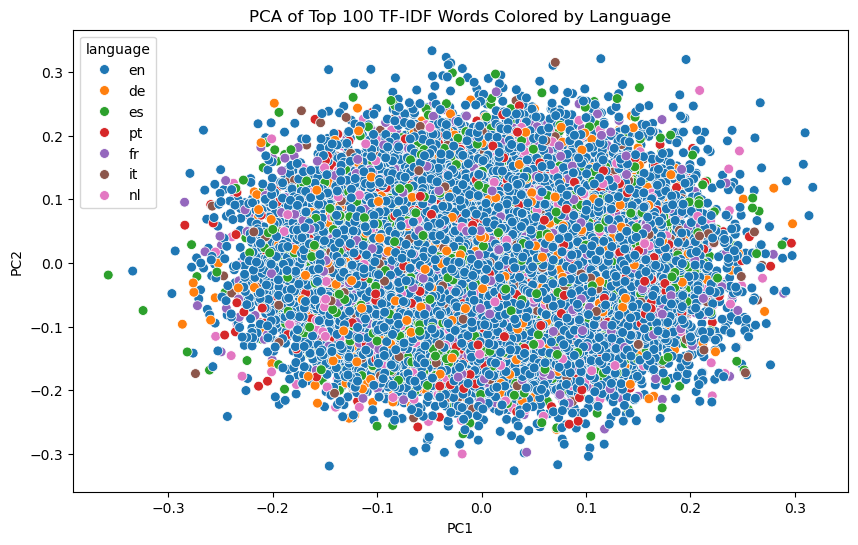

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


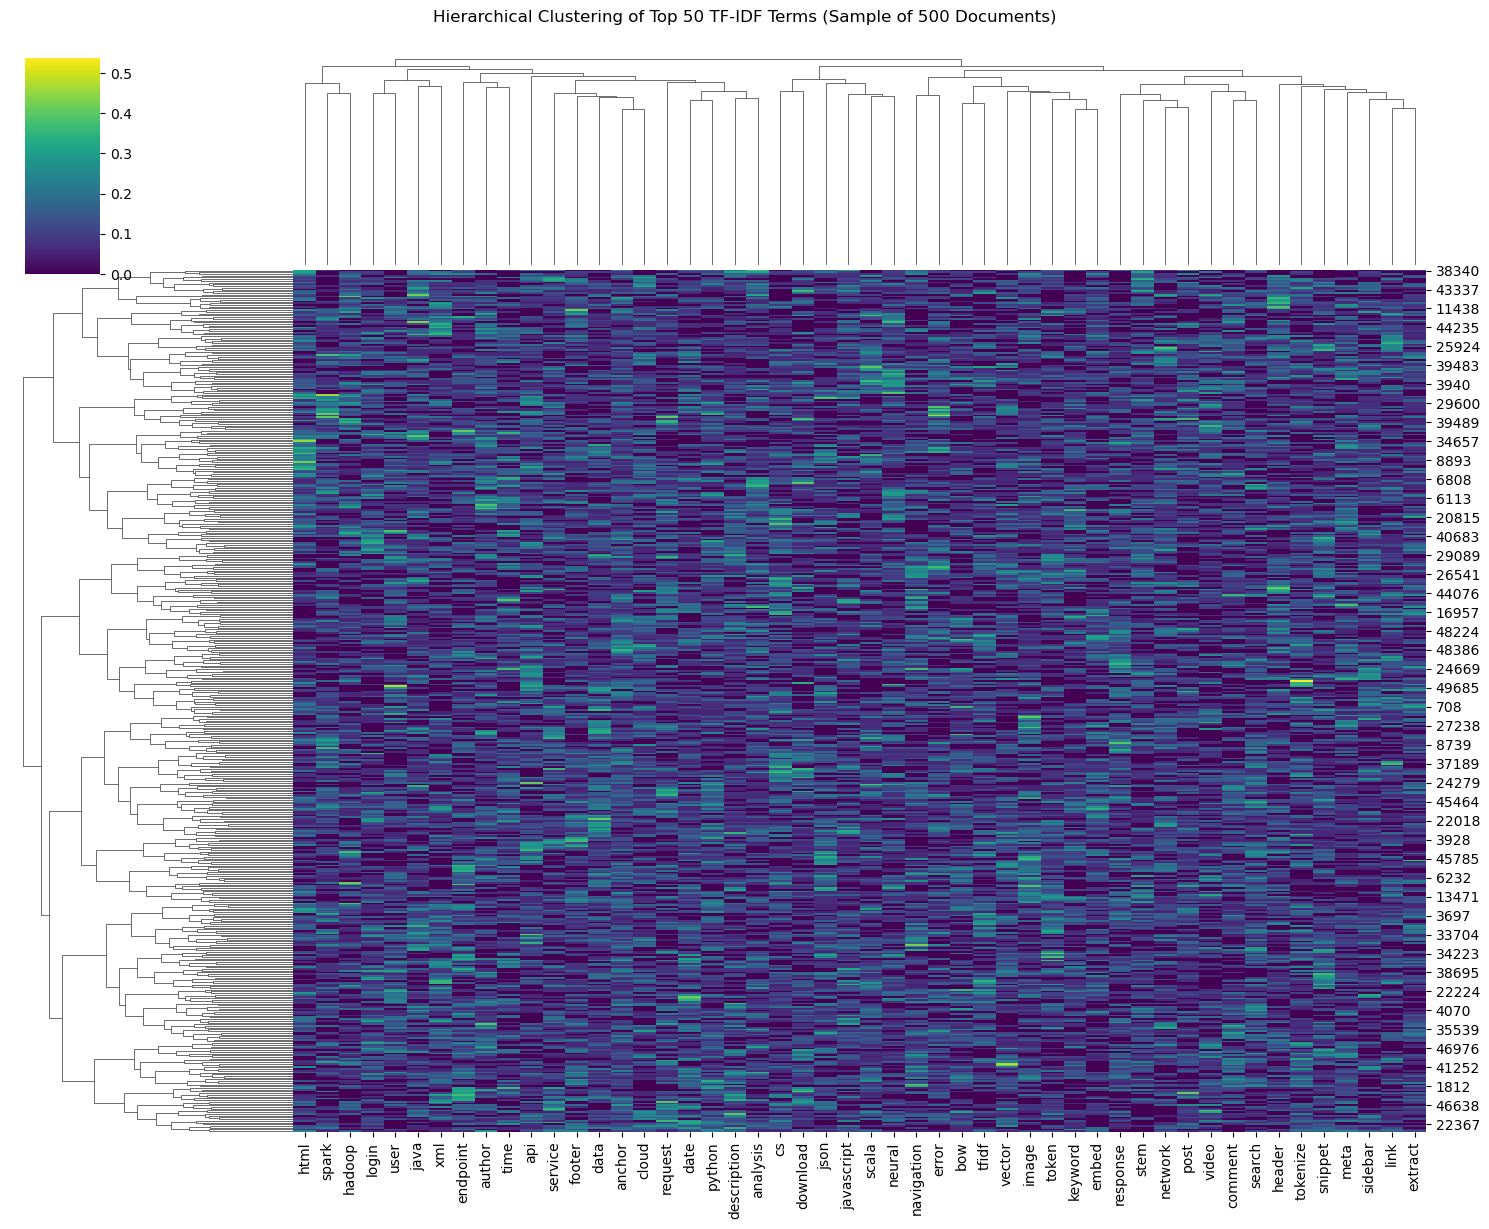

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3252\295881175.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aggregate_tfidf', y='term', data=top30_terms, palette='magma')


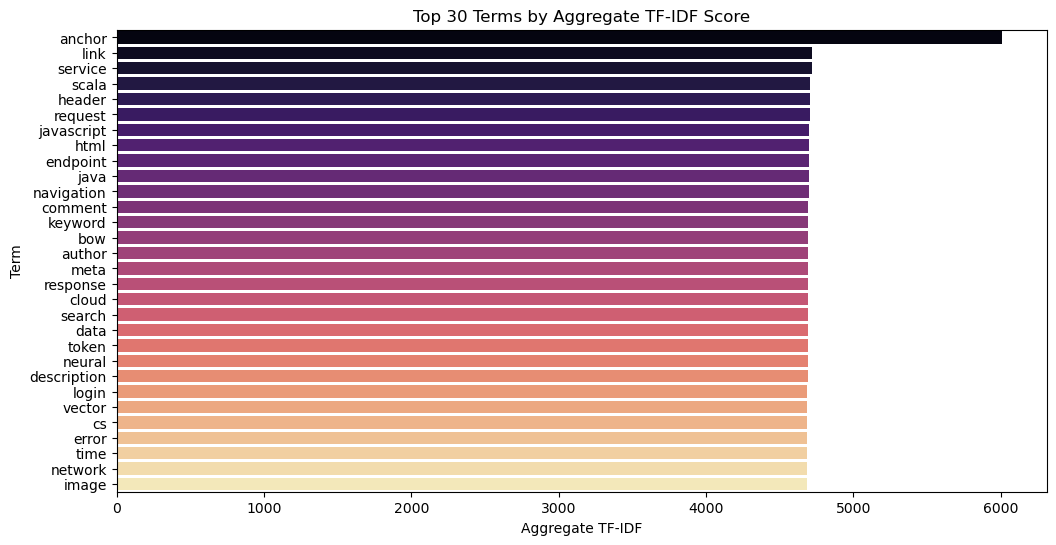

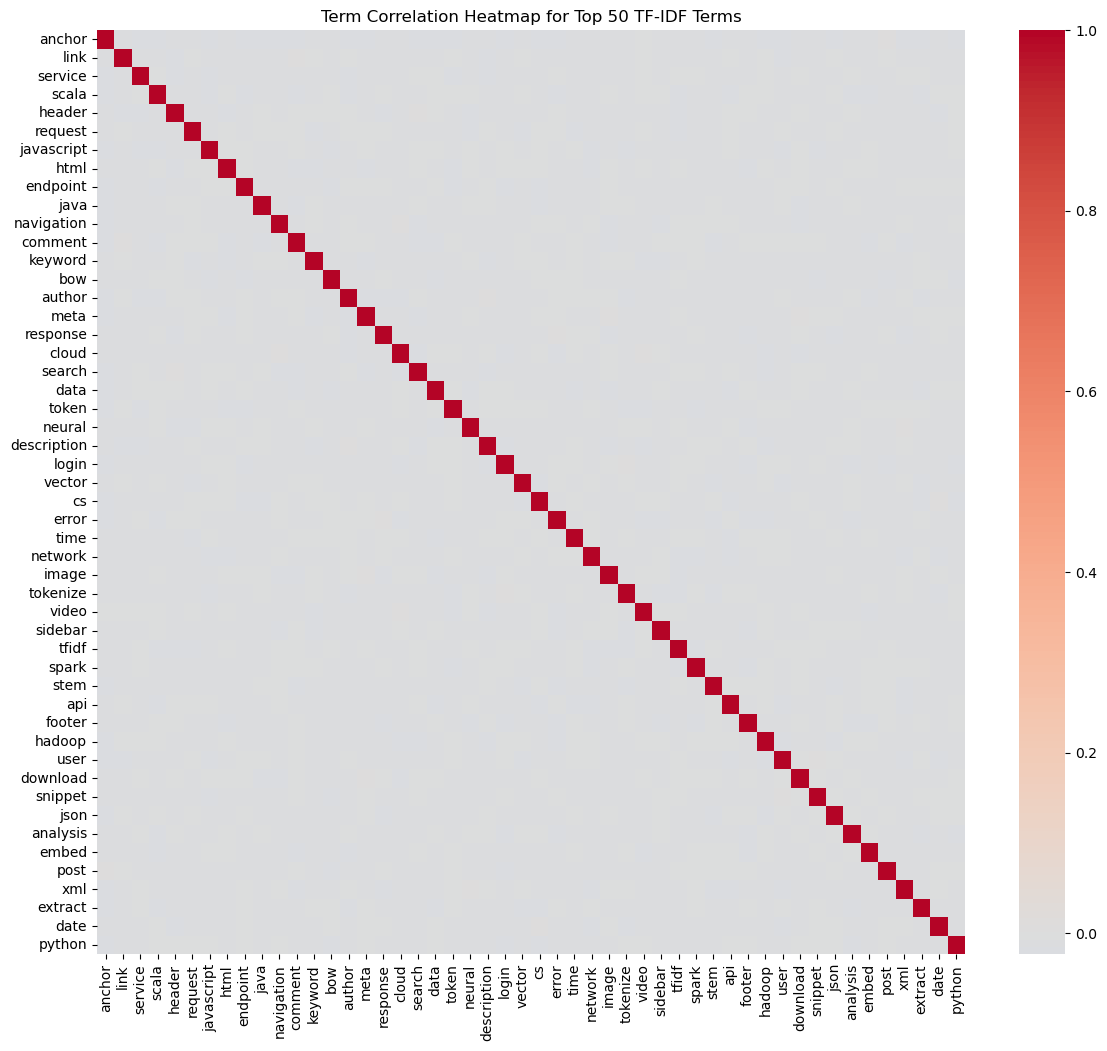

In [18]:

# Task 5: TF-IDF Visualization and Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
import random


# 1. PCA on TF-IDF vectors (K=100)


# Select top 100 TF-IDF words
top100_terms = top100_tfidf['term'].tolist()
tfidf_top100 = tfidf_df[top100_terms]

# Reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_top100)

# Create a DataFrame for plotting
pca_df = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'language': df['language'],      # or 'http_status'
    'http_status': df['http_status']
})

# Scatter plot colored by language
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='language', palette='tab10', s=50)
plt.title('PCA of Top 100 TF-IDF Words Colored by Language')
plt.show()


# 2. Cluster map (hierarchical clustering heatmap)


# Sample 500 documents (or all if less than 500)
sample_docs = df.sample(n=min(500, df.shape[0]), random_state=42).index
tfidf_top50 = tfidf_df[top50_tfidf['term'].tolist()]  # top 50 TF-IDF terms

# Create hierarchical cluster map
sns.clustermap(tfidf_top50.loc[sample_docs], 
               figsize=(15,12), 
               cmap='viridis', 
               metric='euclidean', 
               method='ward')
plt.suptitle('Hierarchical Clustering of Top 50 TF-IDF Terms (Sample of 500 Documents)', y=1.02)
plt.show()


# 3. Bar chart of top 30 terms by aggregate TF-IDF


top30_terms = top50_tfidf.head(30)  # top 30 for visual clarity

plt.figure(figsize=(12,6))
sns.barplot(x='aggregate_tfidf', y='term', data=top30_terms, palette='magma')
plt.title('Top 30 Terms by Aggregate TF-IDF Score')
plt.xlabel('Aggregate TF-IDF')
plt.ylabel('Term')
plt.show()


# 4. Heatmap of term co-occurrence / correlation for top 50 terms


# Compute term-term correlation matrix
term_corr = tfidf_top50.corr()

plt.figure(figsize=(14,12))
sns.heatmap(term_corr, cmap='coolwarm', center=0, annot=False)
plt.title('Term Correlation Heatmap for Top 50 TF-IDF Terms')
plt.show()


